# Creating KNN algo

In [1]:
import numpy as np
from collections import Counter

In [10]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [38]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common#[0][0]

In [37]:
# tutorial about Counter:
a = [1,1,1,2,2,3,4,5,6]
from collections import Counter
most_common = Counter(a).most_common() #[0][0]
print(most_common)
#output shows the number of repetition of each array in list a

[(1, 3), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1)]


# Training

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [5]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [50]:
#loading data
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [22]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

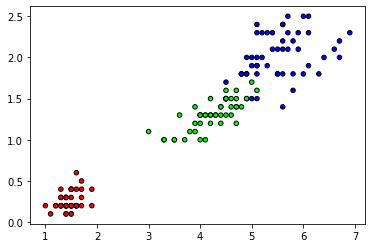

In [31]:
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

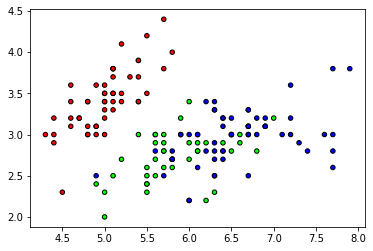

In [47]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [39]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [40]:
print(predictions)

[[(1, 4), (2, 1)], [(2, 3), (1, 2)], [(2, 5)], [(0, 5)], [(1, 5)], [(0, 5)], [(0, 5)], [(0, 5)], [(1, 5)], [(2, 5)], [(1, 5)], [(0, 5)], [(2, 5)], [(1, 5)], [(0, 5)], [(1, 5)], [(2, 5)], [(0, 5)], [(2, 5)], [(1, 5)], [(1, 5)], [(1, 5)], [(1, 5)], [(1, 5)], [(2, 5)], [(0, 5)], [(2, 4), (1, 1)], [(1, 5)], [(2, 5)], [(0, 5)]]


In [14]:
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.9666666666666667
